One can open this tutorial in Google Colab (is recommended)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/LuchnikovI/RQC_School_Rapid_prototyping/1_Tensors_in_TensorFlow.ipynb)

## Here we import all necessary libraries.

In [1]:
# the central library we are going to use
# to operate with tensors and to perform
# optimization
import tensorflow as tf

# library for plotting
import matplotlib.style as style
import matplotlib.pyplot as plt

import math

## In this notebook we consider a central class tf.Tensor, that represents a tensor (multidimensional table or array), its main attributes and basic manipulations with tensors.
### 1) One can initialize tensor in many different ways. Here we show only several basic ones.

Tensor of shape (2, 2, 2, 2) and dtype tf.float32 filled by zeros:

In [ ]:
zeros = tf.zeros((2, 2, 2, 2), dtype=tf.float32)

Tensor of shape (3, 3, 3) and dtype tf.float64 filled by ones:

In [ ]:
ones = tf.ones((3, 3, 3), dtype=tf.float64)

Tensor of shape (2, 2, 2, 2) and dtype tf.float32 filled by i.i.d random samples from the standard normal distribution N(0, 1):

In [ ]:
n = tf.random.normal((2, 2, 2, 2), dtype=tf.float32)

Tensor of shape (4, 4, 2) and dtype tf.float64 filled by i.i.d random samples from the uniform distribution on the interval (0, 1):

In [ ]:
u = tf.random.uniform((4, 4, 2), dtype=tf.float64)

The identity matrix of tf.complex128 dtype and size 4x4:

In [ ]:
eye = tf.eye(4, dtype=tf.complex128)

Range of values from 0, to 1 with a step 0.1 of tf.float32 dtype:

In [ ]:
rng = tf.range(0, 1, 0.1, dtype=tf.float32)

Tensor of dtype tf.float64 built from a python list or np.array:

In [ ]:
const = tf.constant([2, 3, 1, 0], dtype=tf.float64)

### 2) Any tensor has several attributes. The most important from them are shape and dtype.

Shape is a tuple specifies the sizes of a tensor (height, width, depth, etc):

In [ ]:
print('Shape of a tensor u is {}'.format(u.shape))

Shape of a tensor u is (4, 4, 2)


dtype shows type of values of a tensor. They can be different, the most widely used are tf.float32, tf.float64, tf.complex64, tf.complex128, tf.bool, tf.int16, tf.int32.

In [ ]:
print('dtype of a tensor u is {}'.format(u.dtype))

dtype of a tensor u is <dtype: 'float32'>


### 3) Now let us consider basic operations over tensors, namely tf.reshape and tf.transpose.

In priveouse blocks of code we defined several tensors,
let us play with them. For the tensor n with shape (2, 2, 2, 2) let us transform first two indices to multiindex via tf.reshape function (we turn from the shape (2, 2, 2, 2) to (4, 2, 2)). The resulting tensor has 3 indices instead of 4, and its first index is a multiindex obtained by merging first two indices of the input tensor n:

In [ ]:
n_resh = tf.reshape(n, (4, 2, 2))
print('shape of the input tensor n is {}'.format(n.shape))
print('shape of a reshaped tensor n_resh is {}'.format(n_resh.shape))

shape of the input tensor n is (2, 2, 2, 2)
shape of a reshaped tensor n_resh is (4, 2, 2)


Now let us rearrange indices of this tensor, assume that we want to swap first and last indices. Note, that in python index numbering starts from 0. One can use tf.transpose function for this purposies. This function takes tensor and new order of indices as an input:

In [ ]:
n_transp = tf.transpose(n_resh, (2, 1, 0))
print('shape of the input tensor is {}'.format(n_resh.shape))
print('shape of a transposed tensor is {}'.format(n_transp.shape))

shape of the input tensor is (4, 2, 2)
shape of a transposed tensor is (2, 2, 4)


### 4) Let us consider an example from real life.

At first we initialize density matrix of Bell state $\rho = |\psi\rangle\langle\psi|, \ |\psi\rangle = \frac{1}{\sqrt{2}}\left(|1\rangle\otimes |1\rangle + |0\rangle \otimes |0\rangle\right)$:

In [ ]:
'''Bell state'''

# unnormalized Bell state
psi = tf.constant([1, 0, 0, 1], dtype=tf.complex128)
# normalized Bell state
psi = psi / tf.linalg.norm(psi)

# density matrix of Bell state
# tf.tensordot computes convalution of two
# tensors with respect to neighboring indices,
# if number of indices to convolve axes=0, then
# it returns tensor product of two tensors
rho = tf.tensordot(psi, tf.math.conj(psi), axes=0)
print(rho)

tf.Tensor(
[[0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]], shape=(4, 4), dtype=complex128)


Now we can calculate partial density matrices of first and second qubits by using tf.reshape and tf.transpose:

In [ ]:
# first of all we reshape density matrix into a
# tensor of shape (2, 2, 2, 2) in order to
# highlight indexes of first and second qubits
rho_resh = tf.reshape(rho, (2, 2, 2, 2))

# now we need to take a trace over 1st and
# 3rd indices to get the partial density matrix
# of first qubit. To do that, let us swap 1st and
# 2nd indices in order to group 1st and 3rd indices
# at last position
rho_transp = tf.transpose(rho_resh, (0, 2, 1, 3))

# now we can take a trace with respect to the last two
# indices and end up with partial density matrix of
# first qubit
rho_1 = tf.linalg.trace(rho_transp)
print('Density matrix of first qubit is {}'.format(rho_1))

# we can do almost the same to calculate density matrix
# of second qubit
rho_transp = tf.transpose(rho_resh, (1, 3, 0, 2))
rho_2 = tf.linalg.trace(rho_transp)
print('Density matrix of first qubit is {}'.format(rho_2))

Density matrix of first qubit is [[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]
Density matrix of first qubit is [[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]


One can see, that both partial density matrices are completely mixed, what is expected for Bell state, since Bell state is maximally entangled.

### 5) Now let us consider basic mathematical operations with tensors.

Let us initialize several tensors again

In [ ]:
A = tf.random.uniform((3, 4))  # default dtype is tf.float32
B = tf.random.uniform((3, 4))
C = tf.random.uniform((5, 3))

D = tf.random.uniform((5, 3, 2))
E = tf.random.uniform((5, 3, 2))
F = tf.random.uniform((2, 3, 5))

G = tf.random.uniform((2, 2, 2, 3, 3, 3))
H = tf.random.uniform((2, 3, 3, 4))
L = tf.random.uniform((10, 10, 10))

# random complex matrix
K_re = tf.random.uniform((10, 10))
K_im = tf.random.uniform((10, 10))
K = tf.complex(K_re, K_im)  # dtype = tf.complex64

One can perform element wise multiplication, summation, subtraction, division, exponentiation, compartison of tensors:

In [ ]:
D * E  # element wise multiplication
D + E  # element wise summation
D - E  # element wise subtraction
D / E  # element wise division
D ** E  # element wise exponentiation
D > E  # element wise comparison, returns tensor of type bool
D < E  # element wise comparison, returns tensor of type bool
D == E  # element wise comparison, returns tensor of type bool
D != E  # element wise comparison, returns tensor of type bool

We can take different subtensors:
![slices.png](https://github.com/LuchnikovI/RQC_School_Rapid_prototyping/blob/master/images/slices.png?raw=1)

In [ ]:
# we can fix some index and take the rest of a tensor
print(L[:, :, 0].shape)
# we can take a slice with respect to some axis
print(L[:, 2:5].shape)
# we can address indices of a tensor from the end
print(L[:, -2].shape)
# we can add auxiliary indices
print(L[:, tf.newaxis, :].shape)
# etc
# play with different combinations of indexing

One can apply different element wise mathematical functions:

In [ ]:
tf.math.exp(D)  # element wise exponent
tf.math.log(D)  # element wise logarithm
tf.math.atan(D)  # element wise atan
tf.math.sqrt(D)  # element wise sqrt
# etc

One can apply different operations that reduce dimensionality of a tensor, e.g. find a maximum value along some axis of a tensor:

In [ ]:
# find the maximum value along axis 1 (shape: (5, 3, 2) -> (5, 2))
tf.reduce_max(D, axis=1)
# find sum along axis 2 (shape: (5, 3, 2) -> (5, 3))
tf.reduce_sum(D, axis=2)
# find product along axis 0 (shape: (5, 3, 2) -> (3, 2))
tf.reduce_prod(D, axis=0)
# find the mean value along axis 1 (shape: (5, 3, 2) -> (5, 2))
tf.reduce_mean(D, axis=1)
# etc

One can perform convolution between tensors indices using different functions.

In [ ]:
# matrix multiplication
C @ B
# convolution between two neighboring indices of two tensors
# shapes: (5, 3, 2)x(2, 3, 5) -> (5, 5)
tf.tensordot(E, F, axes=2)

Function tf.einsum deserves special attention, due to the fact that it allows to perform complicated convolutions between tensors in one comand. Let us consider the following example of a convolution between tensors:

The first string contains the following information. Letters before the comma show all indices of a first tensor, letters after the comma show all indices of the second tensor. If letters are repeated, then einsum takes sum over corresponding indices. Letters after arrow show new order of remaining indices. In the example below, we calculate the following sum:
$$C_{njk} = \sum_{ilm}H_{ijklmn}G_{ilmp}$$.

In [ ]:
C = tf.einsum('ijklmn,ilmp->njk', G, H)

One can perform all basic linear algebraic manipulations with matrices:

In [ ]:
Q, R = tf.linalg.qr(K)  # QR decomposition of a matrix
S, U, V = tf.linalg.svd(K)  # SVD decomposition of a matrix
eigvals, right_eigvecs = tf.linalg.eig(K)  # eigen decomposition of a matrix
expC = tf.linalg.expm(K)  # matrix exponent
C_inv = tf.linalg.inv(K)  # inverse matrix
K_adj = tf.linalg.adjoint(K)  # conjugate transpose matrix
det = tf.linalg.det(K)  # determinant of a matrix
sqrt_K = tf.linalg.sqrtm(K)  # matrix sqrt
# etc

### 6) TensorFlow allows us to massively vectorize a code (in most cases, you do not need to use any loops); let us consider several examples.

If you perform linear algebraic operation over a set of matrices you may pass a set of matrices as one tensor. For example:

In [ ]:
K = tf.random.normal((1000, 10, 5))
Q, R = tf.linalg.qr(K)
print('Shape of a resulting Q tensor is {}'.format(Q.shape))
print('Shape of a resulting R tensor is {}'.format(R.shape))

Shape of a resulting Q tensor is (1000, 10, 5)
Shape of a resulting R tensor is (1000, 5, 5)


In general, a linear algebraic function treats only two last indices of a tensor as matrix indices. For example:

In [ ]:
K = tf.random.normal((2, 2, 2, 2, 10, 5))
Q, R = tf.linalg.qr(K)
print('Shape of a resulting Q tensor is {}'.format(Q.shape))
print('Shape of a resulting R tensor is {}'.format(R.shape))

Shape of a resulting Q tensor is (2, 2, 2, 2, 10, 5)
Shape of a resulting R tensor is (2, 2, 2, 2, 5, 5)


The same is true for matrix multiplication:

In [ ]:
A = tf.random.normal((2, 2, 2, 2, 10, 5))
B = tf.random.normal((2, 2, 2, 2, 5, 20))
C = A @ B
print('Shape of a resulting C tensor is {}'.format(C.shape))

Shape of a resulting C tensor is (2, 2, 2, 2, 10, 20)


There is a very useful feature that is called broadcasting. Let us try to take an element wise sum of two tensors with different shapes:

In [ ]:
A = tf.random.normal((1, 2, 1, 4, 5))
B = tf.random.normal((1, 2, 5, 1, 5))
C = A + B
print('Shape of a resulting tensor is {}'.format(C.shape))

Shape of a resulting tensor is (1, 2, 5, 4, 5)


In this particular case, we do not get any error because TensorFlow performs an additional operation over tensors under the hood. It takes the first tensor of shape (1, 2, 1, 4, 5), makes 5 copies of this tensor out of original one, and concatenates them along axis=2. The resulting tensor has shape (1, 2, 5, 4, 5). The same thing it does with the second tensor: it makes 4 copies of the second tensor and concatenates them along axis=3 and ends up with tensor of shape (1, 2, 5, 4, 5). Now both tensors have the same shape and they can be summed element wisely. The graphical representation of this process is given on the image below.
![broadcasting.png](https://github.com/LuchnikovI/RQC_School_Rapid_prototyping/blob/master/images/broadcasting.png?raw=1)

One can use broadcasting to vectorize different operations with tensors. For example, we can calculate tensor product of two sets of vectors:

In [ ]:
# first set of vectors
v = tf.random.normal((1000, 4))  # 1000 vectors of size 4
# second set of vectors
w = tf.random.normal((1000, 6))  # 1000 vectors of size 6

# adding additional dimension to v (shape:(1000, 4)->(1000, 4, 1))
v = v[:, :, tf.newaxis]
# adding additional dimension to w (shape:(1000, 6)->(1000, 1, 6))
w = w[:, tf.newaxis, :]
# makinguse of broadcasting (tensor product)
wv = w * v
print('Shape of a resulting tensor {}'.format(wv.shape))

Shape of a resulting tensor (1000, 4, 6)


### 7)Now let us consider a simple physical example of spin echo.

Here we simulate the behavior of a set of spins that do not interact with each other but have different frequency of precession around $z$ axis. Dynamics of each spin is described by a Hamiltonian $H = \epsilon \sigma_x$, where $\epsilon\sim N(0, 1)$, which means that frequencies of precession are distributed according to normal distribution. At the beginning all spins in the same state $|\uparrow\rangle$, then we apply $\pi/2$ impulse to the system, wait for time $T$ and apply $\pi$ impulse. After time  $T$ we should observe the revival of a signal. For simplicity, we assume that each particular spin experiences unitary evolution, i.e. there is no external noise that effects spins dynamics. The code simulatin dynamics of an ensemble is below.

In [2]:
#================Parameters==============#
N = 100000  # number of spins
dt = 0.1  # time step size
warm_up_T = 2  # time before first impuls
T = 10  # time before second impuls
dT = 1.6  # duration of pi impulse
#========================================#

# Pauli matrices
sigma_x = tf.constant([[0, 1], [1, 0]], dtype=tf.complex128)
sigma_y = tf.constant([[0 + 0j, -1j], [1j, 0 + 0j]], dtype=tf.complex128)
sigma_z = tf.constant([[1, 0], [0, -1]], dtype=tf.complex128)

# All Pauli matrices in one tensor of shape (3, 2, 2)
sigma = tf.concat([sigma_x[tf.newaxis],
                   sigma_y[tf.newaxis],
                   sigma_z[tf.newaxis]], axis=0)

'''Initial density matrices'''
# denisty matrix of one spin (shape=(2, 2))
rho = tf.constant([[1, 0], [0, 0]], dtype=tf.complex128)

# density matrix of N spins (shape=(N, 2, 2))
rho = rho[tf.newaxis]  # adding aux. dim.
rho = tf.tile(rho, (N, 1, 1))  # make copies

'''Hamiltonians of all spins'''
# Hamiltonian of one spin (shape=(2, 2))
H = tf.constant([[0.5, 0], [0, -0.5]], dtype=tf.complex128)

# disordered amplitudes of a Hamiltonian (shape=(N, 1, 1))
delta = tf.random.normal((N, 1, 1))
delta = tf.cast(delta, dtype=tf.complex128)

# Hamiltonian per spin (shape=(N, 2, 2))
H = H * delta  # making use of broadcasting

# Hamiltonians with control signal implementing
# pi and pi/2 impulses
H_c = H - 0.5 * math.pi * (1 / dT) * sigma_x

'''Unitary transformations of all spins'''
# Unitary transformations per spin (shape=(N, 2, 2))
U = tf.linalg.expm(-1j * H * dt)

# Unitary transformations per spin with control
U_c = tf.linalg.expm(-1j * H_c * dt)

'''Simulation'''
list_of_rho = []  # this list will be filed by value of dens. matrix per time step
list_of_rho.append(tf.reduce_mean(rho, axis=0)) # adding first dens. matrix
warm_up_iters = int(warm_up_T / dt + 1e-3) # number of iterations before first impuls

for _ in range(warm_up_iters):
    # unitary transformation of all density matrices
    rho = U @ rho @ tf.linalg.adjoint(U)
    # adding dens. matrix to the list
    list_of_rho.append(tf.reduce_mean(rho, axis=0))

# firs impulse (pi/2)
first_puls_iters = int(0.5*dT / dt + 1e-3)
for _ in range(first_puls_iters):
    # unitary transformation of all density matrices
    rho = U_c @ rho @ tf.linalg.adjoint(U_c)
    # adding dens. matrix to the list
    list_of_rho.append(tf.reduce_mean(rho, axis=0))

iters = int(T / dt + 1e-3)  # number of iterations before second impuls
for _ in range(iters):
    # unitary transformation of all density matrices
    rho = U @ rho @ tf.linalg.adjoint(U)
    # adding dens. matrix to the list
    list_of_rho.append(tf.reduce_mean(rho, axis=0))

# second impulse (pi)
second_puls_iters = int(dT / dt + 1e-3)
for _ in range(second_puls_iters):
    # unitary transformation of all density matrices
    rho = U_c @ rho @ tf.linalg.adjoint(U_c)
    # adding dens. matrix to the list
    list_of_rho.append(tf.reduce_mean(rho, axis=0))

iters = 2 * int(T / dt + 1e-3)  #remaining iterations
for _ in range(iters):
    # unitary transformation of all density matrices
    rho = U @ rho @ tf.linalg.adjoint(U)
    # adding dens. matrix to the list
    list_of_rho.append(tf.reduce_mean(rho, axis=0))

# convert list to a tensor
list_of_rho = tf.convert_to_tensor(list_of_rho)
# corresponding bloch vectors
X = tf.einsum('qij,pji->qp', list_of_rho, sigma)

Plotting of the result

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


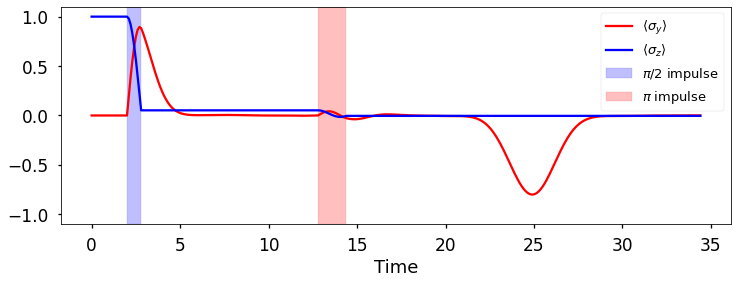

In [4]:
style.use('seaborn-talk')
plt.figure(figsize=(12, 4))
plt.tick_params(axis='both', which='both', labelsize=17)
plt.ylim(top=1.1, bottom=-1.1)
plt.plot(tf.linspace(0., 3*T+warm_up_T + 1.5 * dT, X.shape[0]),
         X[:, 1], 'r')
plt.plot(tf.linspace(0., 3*T+warm_up_T + 1.5 * dT, X.shape[0]),
         X[:, 2], 'b')
plt.xlabel('Time', fontsize=18)
plt.axvspan(warm_up_T, warm_up_T + 0.5*dT, alpha=0.25, color='blue')
plt.axvspan(warm_up_T + T + 0.5*dT, warm_up_T + T + 1.5*dT, alpha=0.25, color='red')
plt.legend([r'$\langle\sigma_y\rangle$',
            r'$\langle\sigma_z\rangle$',
            r'$\pi/2$ impulse',
            r'$\pi$ impulse'], fontsize=13)
plt.savefig('spin_echo.pdf')